In [109]:
import numpy as np
import matplotlib.pyplot as plt

#To make the dendrograms
import plotly.figure_factory as ff

#To use the built-in hierarchical clustering function
from scipy.cluster.hierarchy import dendrogram, linkage

In [110]:
x = np.random.uniform(0, 1, 10)
y = np.random.uniform(0, 1, 10)
X = np.column_stack((x, y))

In [111]:
def hierarchical_clustering(X, n_clusters=2):
    n_samples, n_features = X.shape
    labels = np.zeros(n_samples)
    cluster_centers = np.zeros((n_clusters, n_features))

    # Initialize each sample as a cluster
    clusters = [[i] for i in range(n_samples)]

    while len(clusters) > n_clusters:
        min_dist = float('inf')
        merge_indices = None

        # Calculate pairwise distances between clusters
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = complete_linkage_distance(X, clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)

        # Merge the two clusters with the minimum distance
        cluster1, cluster2 = clusters[merge_indices[0]], clusters[merge_indices[1]]
        clusters.pop(max(merge_indices))
        clusters.pop(min(merge_indices))
        clusters.append(cluster1 + cluster2)

    # Assign labels to each sample based on the clustering result
    for i, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = i

    # Calculate cluster centers
    for i, cluster in enumerate(clusters):
        cluster_centers[i] = np.mean(X[cluster], axis=0)

    return labels, cluster_centers

def complete_linkage_distance(X, cluster1, cluster2):
    max_dist = float('-inf')
    for i in cluster1:
        for j in cluster2:
            dist = np.linalg.norm(X[i] - X[j])
            if dist > max_dist:
                max_dist = dist
    return max_dist

In [112]:
n = np.shape(X)[0]
dendrogram_info = np.zeros((np.shape(X)[0], np.shape(X)[0]))
i = 0
while n > 1:
    labels, cluster_centers = hierarchical_clustering(X, n_clusters = n)
    n -= 1
    dendrogram_info[i, :] = labels
    i += 1

In [113]:
fig = ff.create_dendrogram(X, color_threshold = 0.25)
fig.update_layout(width=800, height=500)
fig.show()

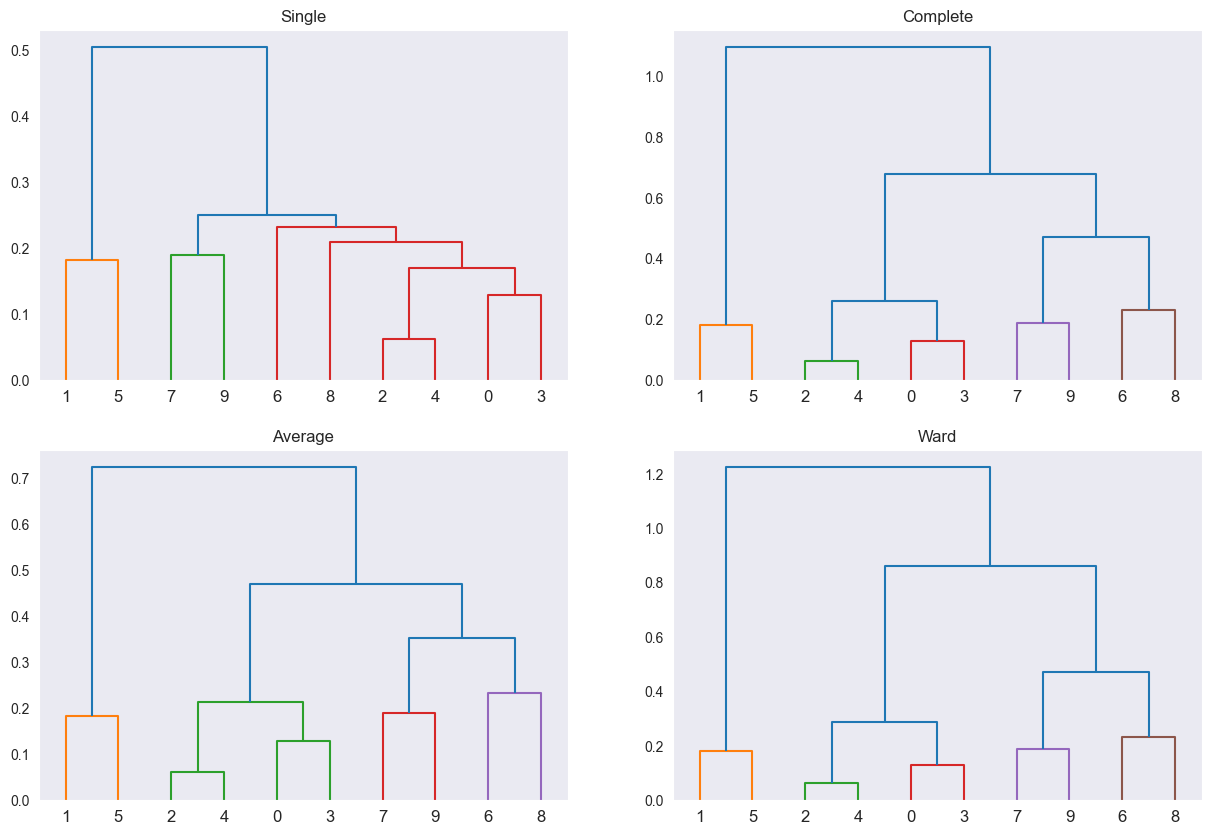

In [114]:
Z1 = linkage(X, method='single', metric='euclidean')
Z2 = linkage(X, method='complete', metric='euclidean')
Z3 = linkage(X, method='average', metric='euclidean')
Z4 = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1, color_threshold = 0.25), plt.title('Single')#, plt.axhline(y=0.15, color = 'k')
plt.subplot(2,2,2), dendrogram(Z2, color_threshold = 0.25), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3, color_threshold = 0.25), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4, color_threshold = 0.25), plt.title('Ward')
plt.show()